# Анализ рынка видеоигр

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

План действий: 
- Загрузим и изучим данные;
- Выполним предобработку данных (работа со столбцами, обработка дублей и пропусков);
- Выполним исследовательских анализ данных (EDA): Выберем актуальный период анализа, посмотрим на продажи в актуальном периоде, узнаем влияние отзывов на продажи, а также посмотрим на распределение игр по жанрам;
- Составим портрет пользователей каждого региона (NA, EU, JP);
- Проверим гипотезы о пользовательском рейтинге платформ и жанров;
- Подведем итоги и напишем заключение и рекомендации.

## Загрузка и просмотр данных

Загрузим датасет, сохраним его в датафрейм и изучим общую информацию о данных.

In [1]:
# Подключение всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

# Настройка pandas для отображения полного текста
pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv('games.csv')
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14543,Armored Core SL: Silent Line Portable,PSP,2009.0,Simulation,0.00,0.00,0.03,0.00,NaN,NaN,NaN
3216,"Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)",X360,2009.0,Shooter,0.34,0.23,0.00,0.06,NaN,NaN,NaN
6538,J-League Pro Soccer Club wo Tsukurou!,SAT,1996.0,Sports,0.00,0.00,0.26,0.00,NaN,NaN,NaN
7840,Teenage Mutant Ninja Turtles 2: Battle Nexus,GC,2004.0,Action,0.15,0.04,0.00,0.01,49.0,4.6,T
10429,The Book of Unwritten Tales,PC,2009.0,Adventure,0.00,0.08,0.00,0.02,82.0,8.2,T


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Описание столбцов:
- `Name`: Название игры (строковый тип, 2 пропущенных значения).
- `Platform`: Платформа игры (строковый тип, без пропусков).
- `Year_of_Release`: Год выпуска игры (числовой тип, 269 пропущенных значений).
- `Genre`: Жанр игры (строковый тип, 2 пропущенных значения).
- `NA_sales`: Продажи в Северной Америке (миллионы копий, числовой тип, без пропусков).
- `EU_sales`: Продажи в Европе (миллионы копий, числовой тип, без пропусков).
- `JP_sales`: Продажи в Японии (миллионы копий, числовой тип, без пропусков).
- `Other_sales`: Продажи в других странах (миллионы копий, числовой тип, без пропусков).
- `Critic_Score`: Оценка критиков (максимум 100, числовой тип, много пропусков: 8137 значений из 16715).
- `User_Score`: Оценка пользователей (максимум 10, строковый тип из-за возможных некорректных данных, 10014 значений).
- `Rating`: Рейтинг ESRB (строковый тип, 9949 значений).

Таким образом, мы загрузили и изучили исходные данные.

## Предобработка данных

### Работа со столбцами

Для начала приведем названия столбцов к змеиному формату.

In [4]:
# Приведение названий столбцов к змеиному формату
data.columns = data.columns.str.lower()

# Проверка названий столбцов
data.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5409,Smart Girl's Party Game,DS,2008.0,Misc,0.31,0.0,0.0,0.02,NaN,tbd,E


Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему.

- `year_of_release` нужно сделать целочисленным, будем использовать тип `Int64` для работы с целыми числами и сохранения пропусков;
- `user_score` нужно сделать числовым, используем `float`, а так же изменим значения "tbd" («to be determined», то есть «подлежит определению») на `None`;
- `rating` сделаем категориальным, так как столбец содержит информацию о категориях.

In [5]:
# Преобразование year_of_release в int
data['year_of_release'] = data['year_of_release'].astype('Int64')  # Используем Int64 для поддержки NaN

# Преобразование user_score в float, обработка некорректных значений
data = data.replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype(float)

# Преобразование rating в категориальный тип
data['rating'] = data['rating'].astype('category')

# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(1), float64(6), object(3)
memory usage: 1.3+ MB


Таким образом, мы успешно привели названия столбцов к змеиному формату, а так же изменили типы столбцов на нужные.

### Работа с пропусками

Теперь более подробно изучим пропуски.

    index           column  missing_values  percentage
0       9       user_score            9125   54.591684
1       8     critic_score            8578   51.319174
2      10           rating            6766   40.478612
3       2  year_of_release             269    1.609333
4       0             name               2    0.011965
5       3            genre               2    0.011965
6       1         platform               0    0.000000
7       4         na_sales               0    0.000000
8       5         eu_sales               0    0.000000
9       6         jp_sales               0    0.000000
10      7      other_sales               0    0.000000


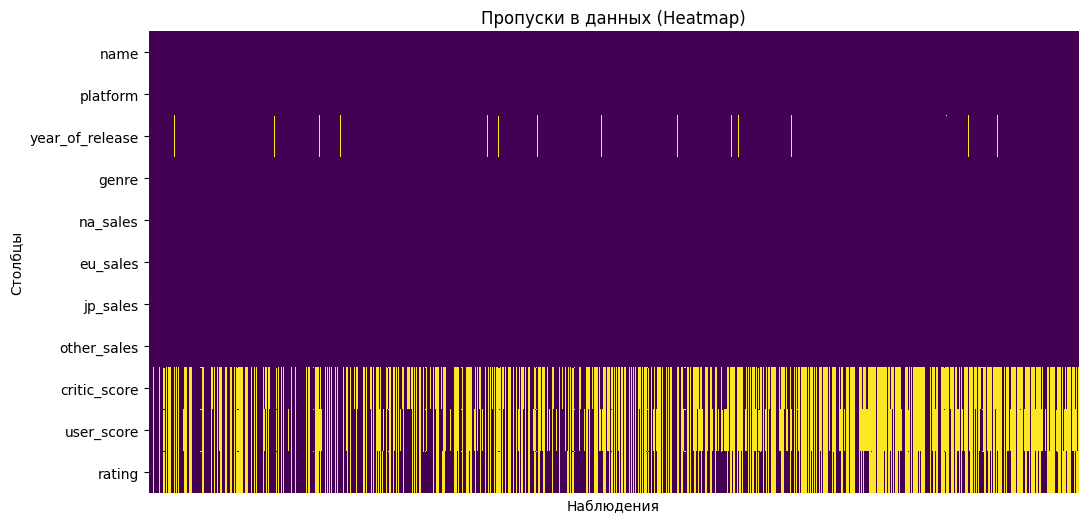

In [6]:
# Подсчет количества пропусков
missing_values_count = data.isnull().sum()

# Вывод численного количества пропусков
missing_values_df = pd.DataFrame({
    'column': missing_values_count.index,
    'missing_values': missing_values_count.values,
    'percentage': (missing_values_count.values / len(data)) * 100
}).sort_values(by='missing_values', ascending=False).reset_index()

print(missing_values_df)

# Построение heatmap для визуализации пропусков
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull().T, cbar=False, cmap='viridis', xticklabels=False)
plt.title('Пропуски в данных (Heatmap)')
plt.xlabel('Наблюдения')
plt.ylabel('Столбцы')
plt.show()

- В столбцах `critic_score` и `user_score` лучше не заполнять пропуски, так как это может сильно исказить анализ. Пропусков в этих столбцах большое количество (51% и 47%), заполнение средним или медианой может привести к сильному искажению действительности;
- Столбец `rating` можно заполнить заглушкой;
- Столбец `year_of_release` содержит ~1.6% пропусков. Эти строки можно удалить, так как они составляют незначительный процент от общего числа данных.
- Столбцы `name` и `genre` содержат по 2 пропуска. Эти строки можно удалить, так как они составляют незначительный процент от общего числа данных (0.01%).

In [7]:
# Удаление строк с пропусками в 'name', 'genre' и 'year_of_release'
data = data.dropna(subset=['name', 'genre', 'year_of_release']).copy()

# Добавление новой категории "unknown" для категориального столбца
data['rating'] = data['rating'].cat.add_categories('unknown')

# Заполнение пропусков значением "unknown"
data['rating'] = data['rating'].fillna('unknown')

# Проверка
print(data[['rating', 'name', 'genre', 'year_of_release']].isnull().sum())

rating             0
name               0
genre              0
year_of_release    0
dtype: int64


Так же опишем причины, которые могли привести к пропускам в данных.

1. <b>Ошибка или недостаток данных при сборе. </b> Во-первых, не все игры получают оценки критиков или пользователей. Во-вторых, данные могут отсутствовать о продажах в отдельных регионах, например, если игра не выпускалась в определённом регионе.
2. <b>Технические ограничения.</b> Датасет может быть составлен из нескольких источников, где информация о некоторых играх отсутствовала и просто была утеряна.
3. <b>Ручной ввод данных.</b> Сотрудники, заносящие данные, могли случайно оставить поля пустыми. Также могут быть неоднородные стандарты хранения, например, рейтинг ESRB не указан для некоторых игр, если игра не проходила сертификацию в этой системе.
4. <b>Неопределенные значения.</b> Некоторые игры могли быть выпущены к моменту сбора данных, и данные о пользовательских оценках ещё не успели накопиться, а также данные о продажах или рейтингах. 
5. <b>Данные, специфичные для региона.</b> Например, японские игры иногда не сертифицируются системой ESRB, а западные критики их не рецензируют.

Работу с пропусками считаем завершенной.

### Работа с дубликатами

Теперь проверим данные на явные дубликаты.

In [8]:
# Проверка на наличие явных дубликатов
duplicate_count = data.duplicated().sum()

# Вывод результата
print(f"Количество явных дубликатов: {duplicate_count}")

Количество явных дубликатов: 0


Проверим данные на неявные дублкаты по столбцам `name`, `platform` и `year_of_release`.

In [9]:
# Приведение названий игр к единому регистру
data['name'] = data['name'].str.strip().str.lower()

# Группировка данных по ключевым столбцам для поиска возможных неявных дубликатов
potential_duplicates = data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

# Вывод возможных неявных дубликатов
print(f"Количество возможных неявных дубликатов: {len(potential_duplicates)}")
# Просмотр примеров
display(potential_duplicates)

Количество возможных неявных дубликатов: 2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


По значениям логично удалить второй дубликат, так как в нем продажи практически равны нулю, что неверно, судя по информации в интернете (https://arcadetemple.com/madden-nfl-13-sales-numbers/)

In [10]:
# Удаление второго дубликата
data = data.drop(index=16230).reset_index(drop=True)

# Проверка на успешное удаление
print(f"Количество строк после удаления: {len(data)}")

Количество строк после удаления: 16443


Работу с дублями считаем завершенной.

### Подсчет суммарных продаж

Теперь посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [11]:
# Вычисление суммарных продаж и запись в новый столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Проверка результата
data[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sample(5)

,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
9562,reader rabbit kindergarten,0.12,0.00,0.0,0.01,0.13
10296,pro evolution soccer 2014,0.00,0.10,0.0,0.01,0.11
5673,dark void,0.19,0.09,0.0,0.03,0.31
8256,batman beyond: return of the joker,0.09,0.06,0.0,0.01,0.16
7518,dying light,0.12,0.06,0.0,0.02,0.20


Таким образом, мы выполнили предобработку данных: обработали названия столбцов и их типы, провели обработку пропусков и дублей, а так же посчитали суммарные продажи во всех регионах.

## Исследовательский анализ данных (EDA)

### Выбор актульного периода

Начнем к временной оценки. Посмотрим, сколько игр выпускалось в разные годы.

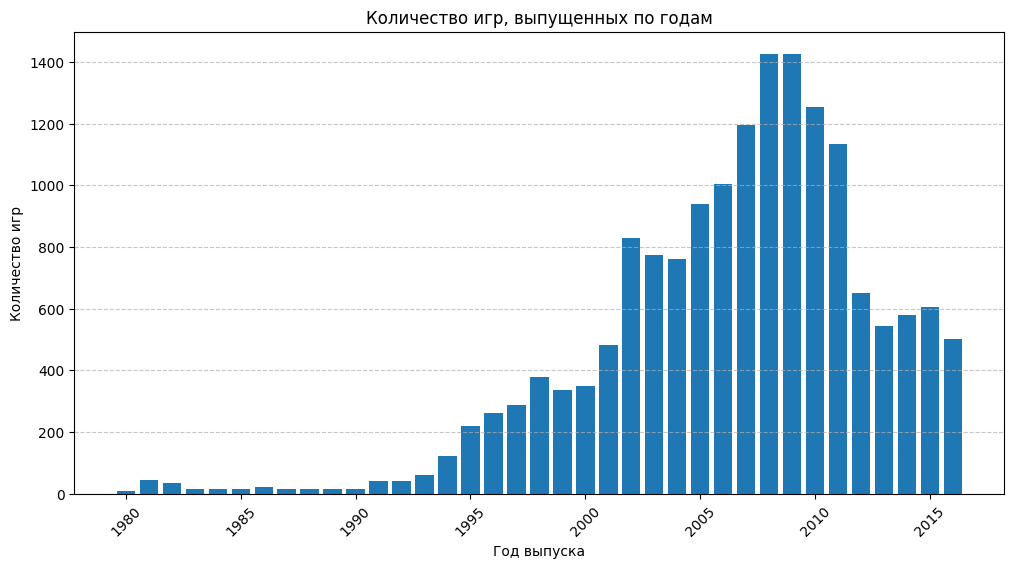

In [12]:
# Группировка данных по году выпуска и подсчёт количества игр
games_per_year = data['year_of_release'].value_counts().sort_index()

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.title('Количество игр, выпущенных по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

На основе данного графике можно сказать, что количество выпускаемых игр резко возросло после определённого времени (примерно с конца 1990-х, начала 2000-х годов), достигнув пика примерно к 2010 году, после чего началось снижение. Возможно, данные до 1995 года стоит исключить, так как они составляют незначительную долю от общего объёма данных и могут искажать анализ.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Узнаем, за какой характерный срок появляются новые и исчезают старые платформы.

<Figure size 1400x800 with 0 Axes>

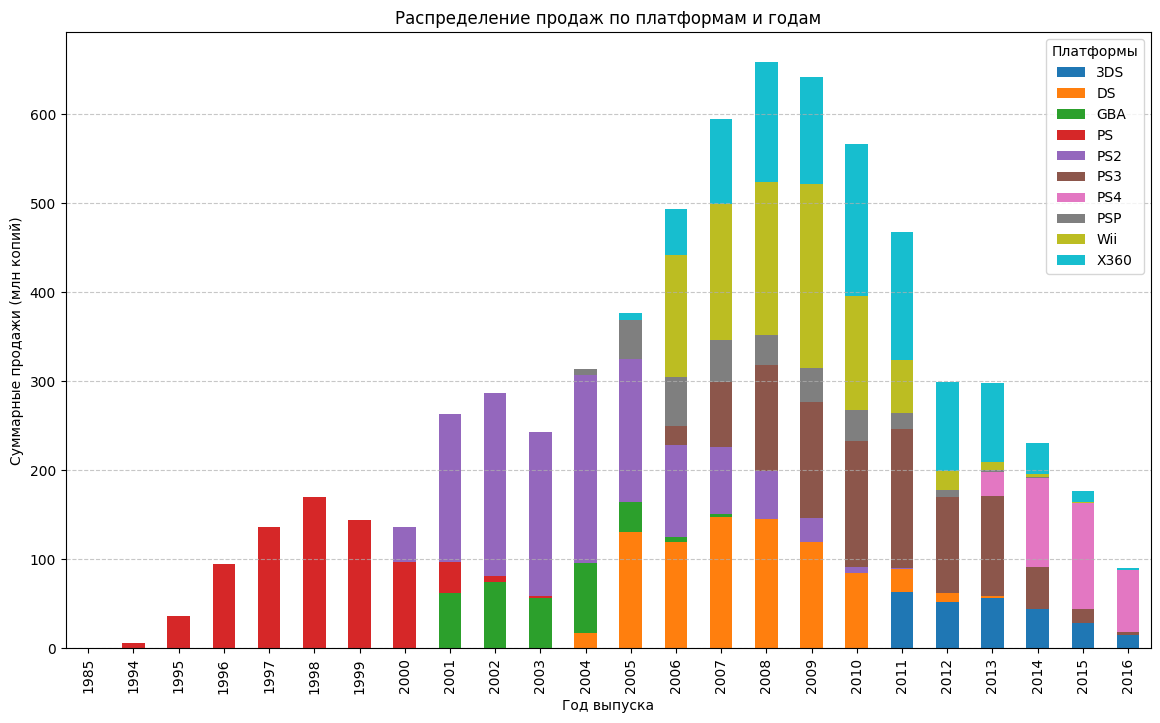

,min,max,lifetime
platform,,,
3DS,2011,2016,5
DS,1985,2013,28
GBA,2000,2007,7
PS,1994,2003,9
PS2,2000,2011,11
PS3,2006,2016,10
PS4,2013,2016,3
PSP,2004,2015,11
Wii,2006,2016,10


In [13]:
# Подсчёт суммарных продаж по платформам
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выбор платформ с наибольшими суммарными продажами (например, топ-10)
top_platforms = platform_sales.head(10).index

# Фильтрация данных только для топ-платформ
top_platforms_data = data[data['platform'].isin(top_platforms)]

# Группировка данных по платформам и годам, суммирование продаж
platform_sales_by_year = top_platforms_data.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

# Построение графиков
plt.figure(figsize=(14, 8))
platform_sales_by_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Распределение продаж по платформам и годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформы')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Анализ характерного срока появления и исчезновения платформ
platform_lifetimes = (
    top_platforms_data.groupby('platform')['year_of_release']
    .agg(['min', 'max'])
    .assign(lifetime=lambda x: x['max'] - x['min'])
)

# Вывод таблицы с анализом
platform_lifetimes

Платформа Nintendo DS появилась только в 2004 году. Попробуем разобраться с этой ошибкой в данных.

In [14]:
# Фильтрация строк, где платформа 'DS' и год выпуска меньше 2004
data[(data['platform'] == 'DS') & (data['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,strongest tokyo university shogi ds,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Обнаружена только одна строка, можем её спокойно удалить.

In [15]:
# Удаление строк, где платформа 'DS' и год выпуска меньше 2004
data = data[~((data['platform'] == 'DS') & (data['year_of_release'] < 2004))].copy()

# Проверка, что строки удалены
data[(data['platform'] == 'DS') & (data['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


<Figure size 1400x800 with 0 Axes>

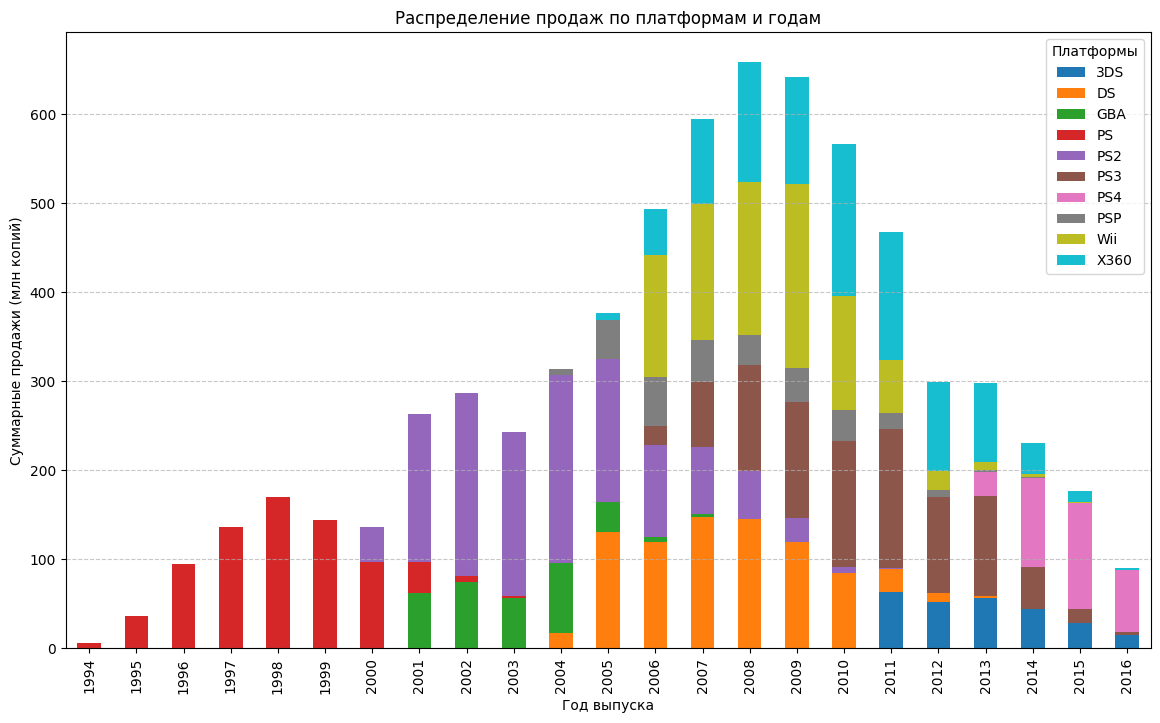

,min,max,lifetime
platform,,,
3DS,2011,2016,5
DS,2004,2013,9
GBA,2000,2007,7
PS,1994,2003,9
PS2,2000,2011,11
PS3,2006,2016,10
PS4,2013,2016,3
PSP,2004,2015,11
Wii,2006,2016,10


In [16]:
# Подсчёт суммарных продаж по платформам
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выбор платформ с наибольшими суммарными продажами (например, топ-10)
top_platforms = platform_sales.head(10).index

# Фильтрация данных только для топ-платформ
top_platforms_data = data[data['platform'].isin(top_platforms)]

# Группировка данных по платформам и годам, суммирование продаж
platform_sales_by_year = top_platforms_data.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

# Построение графиков
plt.figure(figsize=(14, 8))
platform_sales_by_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Распределение продаж по платформам и годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформы')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Анализ характерного срока появления и исчезновения платформ
platform_lifetimes = (
    top_platforms_data.groupby('platform')['year_of_release']
    .agg(['min', 'max'])
    .assign(lifetime=lambda x: x['max'] - x['min'])
)

# Вывод таблицы с анализом
platform_lifetimes

Платформы демонстрируют разные жизненные циклы: короткий (GBA, PS) - около 7-9 лет, средний (PS2, Wii, PSP, X360, PS3) - около 10-11 лет, и долгий (PC) - более 20 лет. Короткий цикл обусловлен быстрым устареванием технологий, а долгий - обновляемостью или широкой поддержкой (например, PC). Современные платформы, такие как PS4, находятся в стадии роста, их продажи ещё не достигли пика. Анализ показывает, что пик продаж платформ приходится на середину их жизненного цикла, что важно учитывать при планировании запусков игр. В целом, логично, что пики продаж примерно совпадают с пиками по количеству выпущенных игр в это время.  

In [17]:
# Посчитаем медианный lifetime платформ
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

В качестве <b>актуального периода</b> возьмем срез с 2013 года. Это позволит учесть тренды в такой динамично меняющейся индустрии, как компьютерные игры. 

In [18]:
# Фильтрация данных за период с 2013 года
filtered_data = data[data['year_of_release'] >= 2013].copy()

# Проверка результата
print(f"Количество строк в отфильтрованном датафрейме: {len(filtered_data)}")
print(filtered_data['year_of_release'].value_counts().sort_index())

Количество строк в отфильтрованном датафрейме: 2233
2013    544
2014    581
2015    606
2016    502
Name: year_of_release, dtype: Int64


### EDA по актуальному периоду (продажи)

Посмотрим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

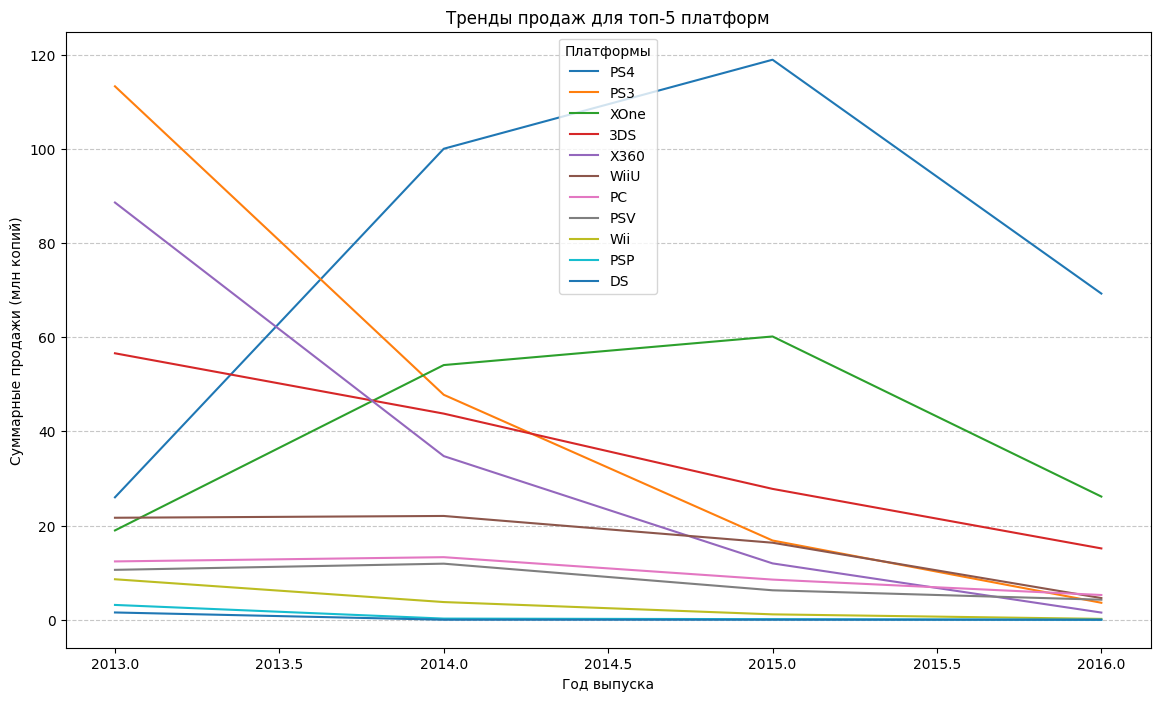

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


In [19]:
# Суммируем продажи по платформам
platform_sales = filtered_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выбор топ-10 платформ по суммарным продажам
top_platforms = platform_sales.index

# Фильтрация данных для топ-10 платформ
top_platforms_data = filtered_data[filtered_data['platform'].isin(top_platforms)]

# Группировка по платформам и годам, суммирование продаж
platform_sales_trend = top_platforms_data.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

# Построение трендов продаж для топ-5 платформ
plt.figure(figsize=(14, 8))
for platform in top_platforms:
    plt.plot(platform_sales_trend.index, platform_sales_trend[platform], label=platform)

plt.title('Тренды продаж для топ-5 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформы')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Вывод таблицы с суммарными продажами
print(platform_sales)

Согласно получившимся результатам, лидерами по суммарным продажам за период с 2013 года являются платформы PS4, PS3, и XOne. PS4 занимает первое место с продажами 314.14 млн копий, демонстрируя устойчивый рост с момента своего выхода. PS3 (181.43 млн) и XOne (159.32 млн) также занимают высокие позиции, но их продажи показывают снижение, что связано с завершением жизненного цикла PS3 и меньшей популярностью XOne по сравнению с PS4. 3DS (143.25 млн) сохраняет стабильные продажи, что делает её привлекательной для определённых сегментов аудитории. Другие платформы, такие как X360, Wii, и DS, показывают минимальные продажи, что свидетельствует об их уходе с рынка.

Перспективные платформы: PS4 демонстрирует наибольший потенциал дальнейшего роста, оставаясь главной платформой для игр. XOne, несмотря на отставание от PS4, также остаётся актуальной. 3DS сохраняет популярность среди аудитории, ориентированной на портативные устройства, что делает её привлекательной для нишевых продуктов.

Внимание рекомендуется сосредоточить на разработке и продвижении игр для PS4 и XOne, так как они находятся на пике популярности. Кроме того, 3DS может быть использована для создания продуктов, ориентированных на её специфическую аудиторию. Остальные платформы, включая PS3, X360, и Wii, находятся в конце своего жизненного цикла и не представляют перспективы для роста.

Построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам.

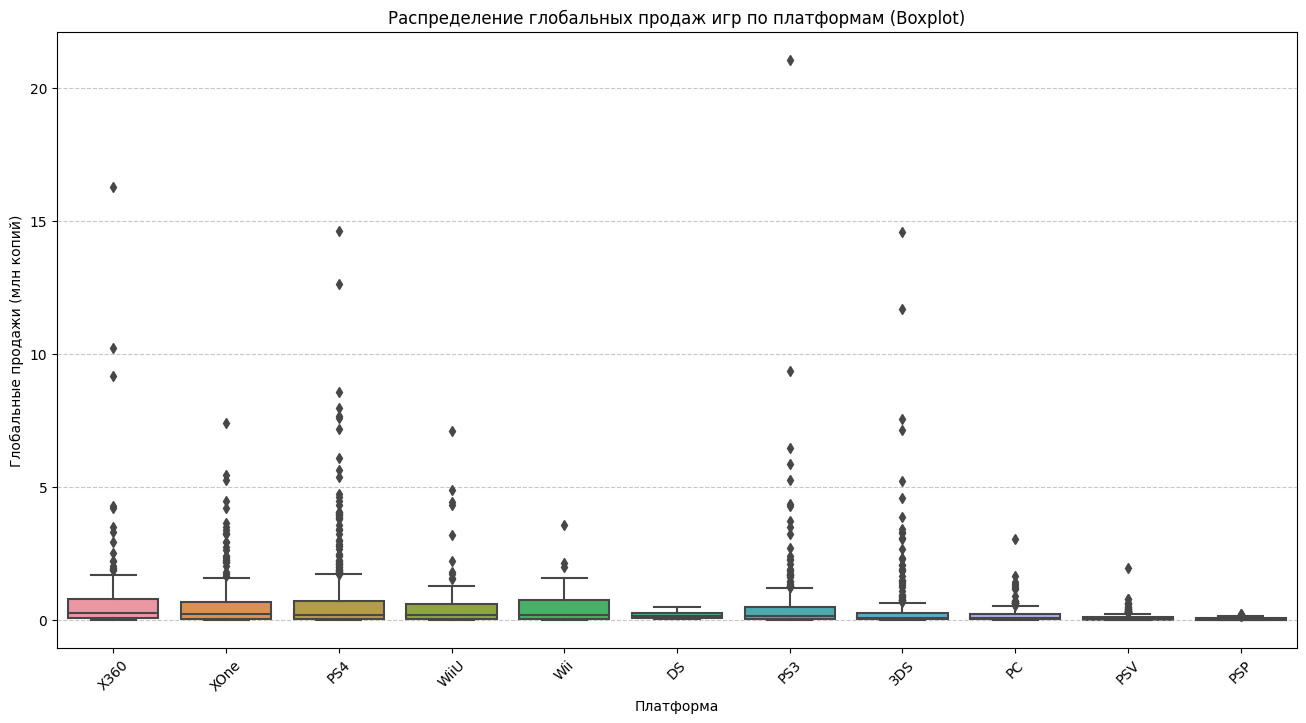

In [20]:
# Рассчитаем медиану продаж для каждой платформы
platform_medians = (
    filtered_data.groupby('platform')['total_sales']
    .median()
    .sort_values(ascending=False)
)

# Сортируем платформы в исходном датафрейме по медиане
filtered_data['platform'] = pd.Categorical(
    filtered_data['platform'],
    categories=platform_medians.index,
    ordered=True
)

# Построение ящика с усами
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=filtered_data,
    x='platform',
    y='total_sales',
    showfliers=True  # не скрыть выбросы
)
plt.title('Распределение глобальных продаж игр по платформам (Boxplot)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

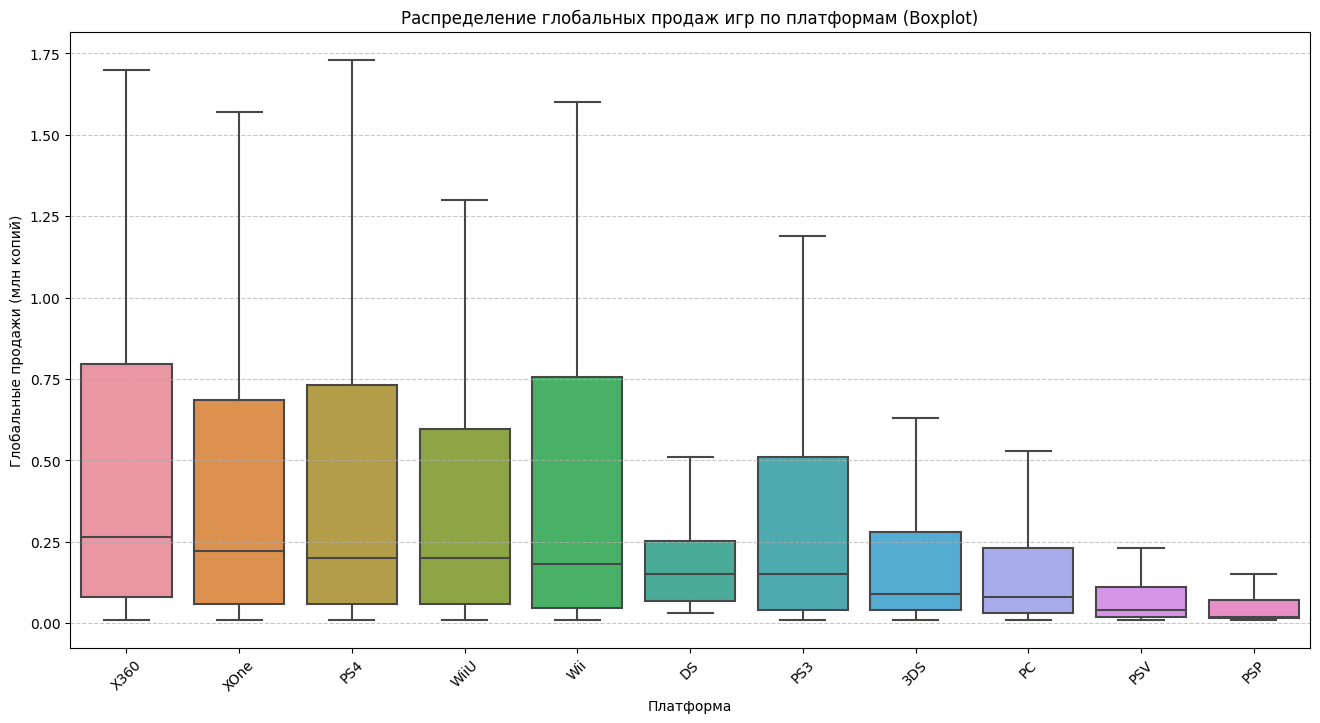

In [21]:
# Построение ящика с усами
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=filtered_data,
    x='platform',
    y='total_sales',
    showfliers=False  # скрыть выбросы
)
plt.title('Распределение глобальных продаж игр по платформам (Boxplot)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Глобальные продажи игр по платформам за период с 2013 года показывают, что PS4 и XOne занимают лидирующие позиции с устойчивыми медианными продажами, подтверждая их актуальность для дальнейшего роста. Платформы прошлого поколения, такие как PS3, X360, и Wii, демонстрируют меньшую активность, а их размах распределения указывает на завершение жизненных циклов. Платформы 3DS и WiiU сохраняют умеренные продажи с относительно стабильными показателями, ориентируясь на свою аудиторию, но их потенциал ограничен. Платформы с минимальными продажами, такие как PSV и PC, имеют низкую медиану и узкий размах, что делает их менее перспективными для масштабных разработок. Таким образом, разработчикам рекомендуется сосредоточиться на платформах с высоким потенциалом роста, таких как PS4 и XOne, сохраняя внимание на нишевые устройства, например, 3DS, для определённых категорий игр.

### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для примера возьмем PS4.

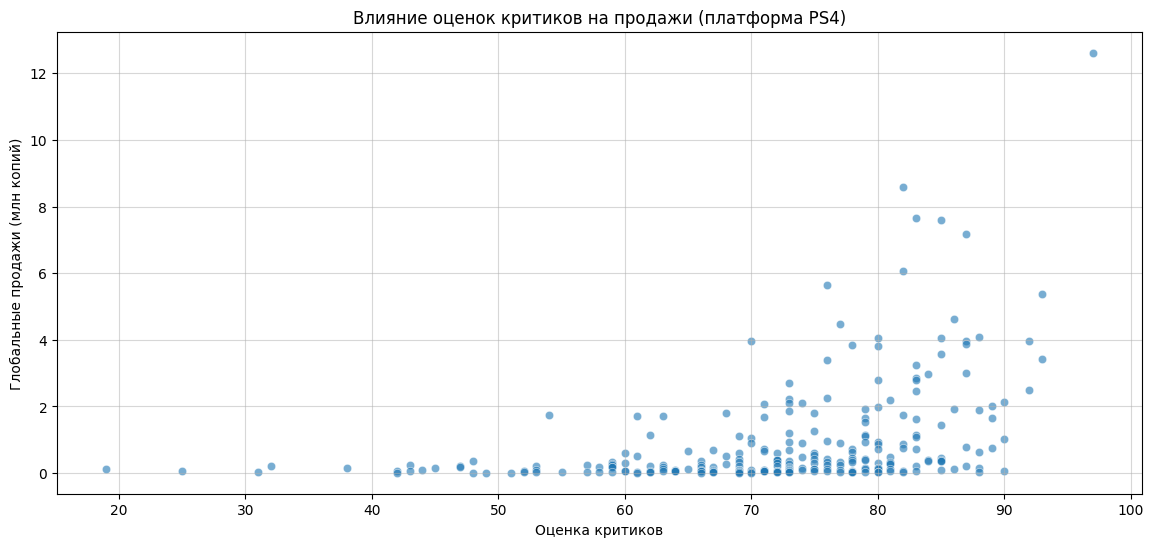

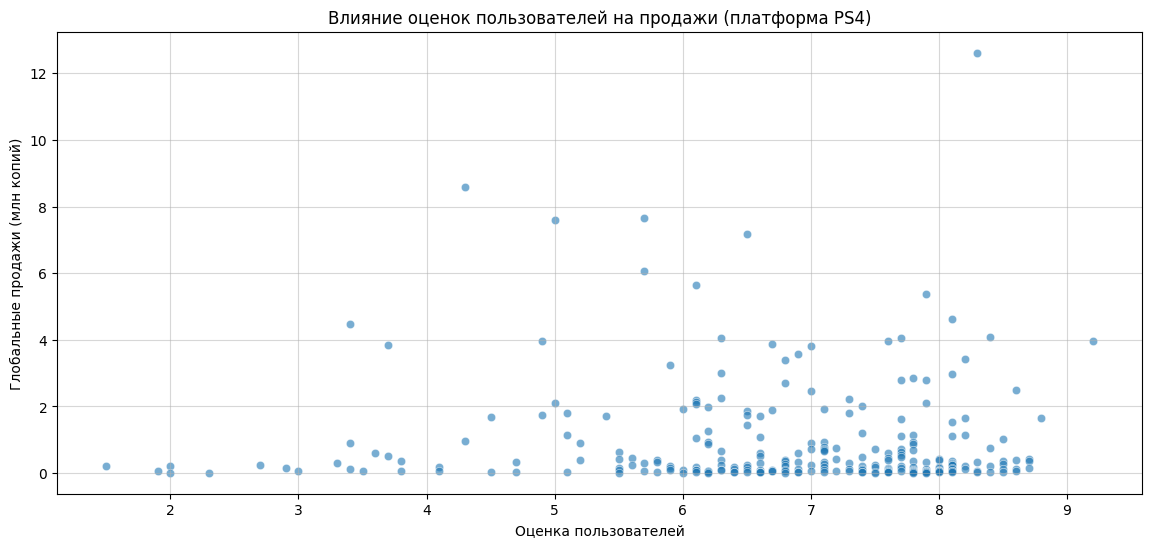

Корреляция между оценками критиков и продажами для PS4: 0.41
Корреляция между оценками пользователей и продажами для PS4: -0.03


In [22]:
# Выберем одну популярную платформу, PS4
platform = 'PS4'
platform_data = filtered_data[filtered_data['platform'] == platform]

# Построение диаграммы рассеяния для отзывов критиков
plt.figure(figsize=(14, 6))
sns.scatterplot(data=platform_data, x='critic_score', y='total_sales', alpha=0.6)
plt.title(f'Влияние оценок критиков на продажи (платформа {platform})')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')
plt.grid(alpha=0.5)
plt.show()

# Построение диаграммы рассеяния для отзывов пользователей
plt.figure(figsize=(14, 6))
sns.scatterplot(data=platform_data, x='user_score', y='total_sales', alpha=0.6)
plt.title(f'Влияние оценок пользователей на продажи (платформа {platform})')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')
plt.grid(alpha=0.5)
plt.show()

# Расчет корреляции
correlation_critic = platform_data[['critic_score', 'total_sales']].corr().iloc[0, 1]
correlation_user = platform_data[['user_score', 'total_sales']].corr().iloc[0, 1]

print(f'Корреляция между оценками критиков и продажами для {platform}: {correlation_critic:.2f}')
print(f'Корреляция между оценками пользователей и продажами для {platform}: {correlation_user:.2f}')

Оценки критиков оказывают умеренное положительное влияние на продажи игр для платформы PS4 (корреляция 0.41), что подтверждается более высокими продажами у игр с оценками ближе к 80-90. В то же время оценки пользователей практически не влияют на продажи (корреляция -0.03), что видно по хаотичному распределению на диаграмме. Это указывает на то, что профессиональные отзывы играют более важную роль в принятии решений о покупке, чем пользовательские рейтинги, и их следует учитывать при разработке маркетинговых стратегий. Лично для меня это немного неожиданный результат (по оценке пользователей).

Соотнесем выводы с продажами игр на других платформах.

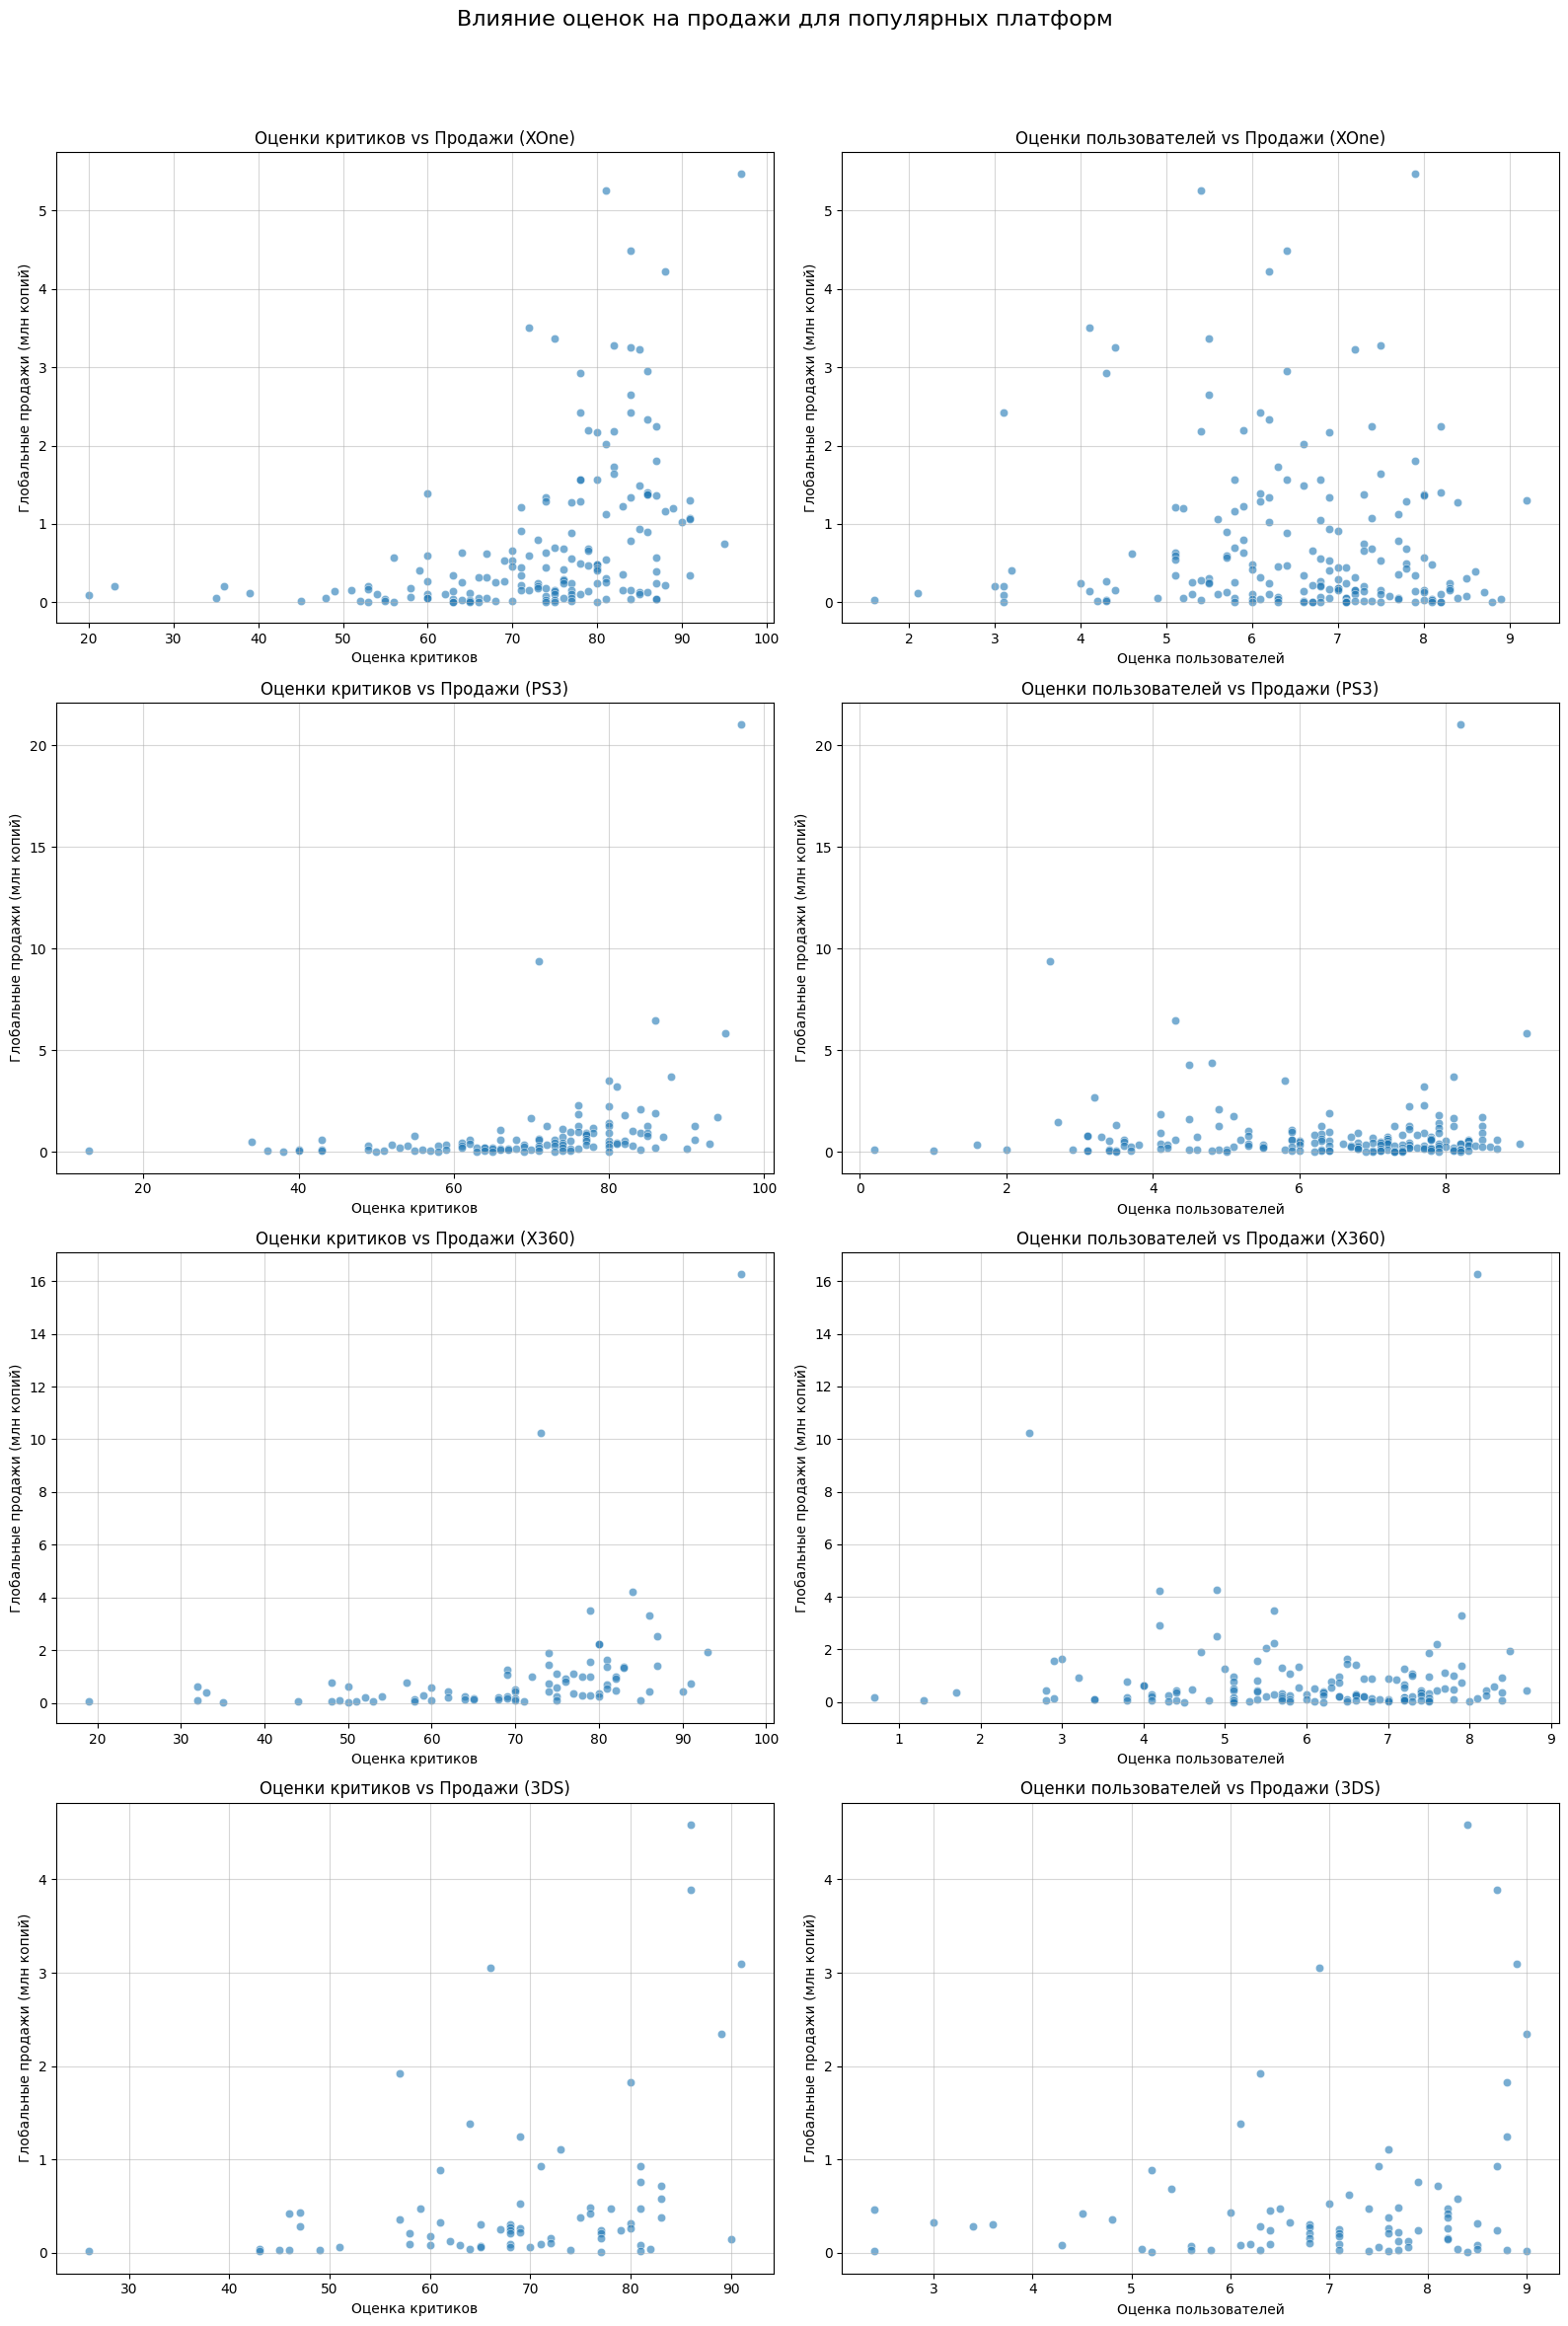

Корреляция между оценками и продажами:


,platform,critic_corr,user_corr
0,XOne,0.416998,-0.068925
1,PS3,0.334285,0.002394
2,X360,0.350345,-0.011742
3,3DS,0.357057,0.241504


In [23]:
# Список популярных платформ
popular_platforms = ['XOne', 'PS3', 'X360', '3DS']

# Размеры графика
fig, axes = plt.subplots(len(popular_platforms), 2, figsize=(16, 6 * len(popular_platforms)))
fig.suptitle('Влияние оценок на продажи для популярных платформ', fontsize=16)

# Создание словаря для хранения корреляций
correlations = []

# Построение графиков для каждой платформы
for i, platform in enumerate(popular_platforms):
    platform_data = filtered_data[filtered_data['platform'] == platform]

    # Диаграмма рассеяния для оценок критиков
    sns.scatterplot(
        data=platform_data,
        x='critic_score',
        y='total_sales',
        alpha=0.6,
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'Оценки критиков vs Продажи ({platform})')
    axes[i, 0].set_xlabel('Оценка критиков')
    axes[i, 0].set_ylabel('Глобальные продажи (млн копий)')
    axes[i, 0].grid(alpha=0.5)

    # Диаграмма рассеяния для оценок пользователей
    sns.scatterplot(
        data=platform_data,
        x='user_score',
        y='total_sales',
        alpha=0.6,
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'Оценки пользователей vs Продажи ({platform})')
    axes[i, 1].set_xlabel('Оценка пользователей')
    axes[i, 1].set_ylabel('Глобальные продажи (млн копий)')
    axes[i, 1].grid(alpha=0.5)

    # Расчёт корреляции
    critic_corr = platform_data[['critic_score', 'total_sales']].corr().iloc[0, 1]
    user_corr = platform_data[['user_score', 'total_sales']].corr().iloc[0, 1]
    correlations.append({'platform': platform, 'critic_corr': critic_corr, 'user_corr': user_corr})

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Преобразование результатов корреляции в DataFrame
correlation_df = pd.DataFrame(correlations)

# Вывод результатов
print("Корреляция между оценками и продажами:")
correlation_df

Оценки критиков продолжают оказывать умеренное положительное влияние на продажи игр для большинства платформ, с коэффициентами корреляции в диапазоне от 0.33 до 0.42. Наибольшая зависимость наблюдается для Xbox One (0.42), что подтверждает важность критических отзывов для современных платформ. Пользовательские оценки в целом демонстрируют минимальное влияние на продажи, с корреляциями, близкими к нулю или отрицательными. Исключением является платформа 3DS, где зависимость от пользовательских оценок слабоположительная (0.24), что может указывать на её более тесную связь с предпочтениями пользователей. Для PS3 и X360 влияние пользовательских оценок практически отсутствует (0.00 и -0.01 соответственно).

В целом, для успешного продвижения игр рекомендуется уделять основное внимание улучшению критических отзывов, особенно на современных платформах, таких как Xbox One, где влияние этих оценок наиболее значимо. Особенности платформы 3DS предполагают, что пользовательские отзывы также могут играть заметную роль, особенно для её аудитории.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Узнаем, что можно сказать о самых прибыльных жанрах и выделяются ли жанры с высокими и низкими продажами.

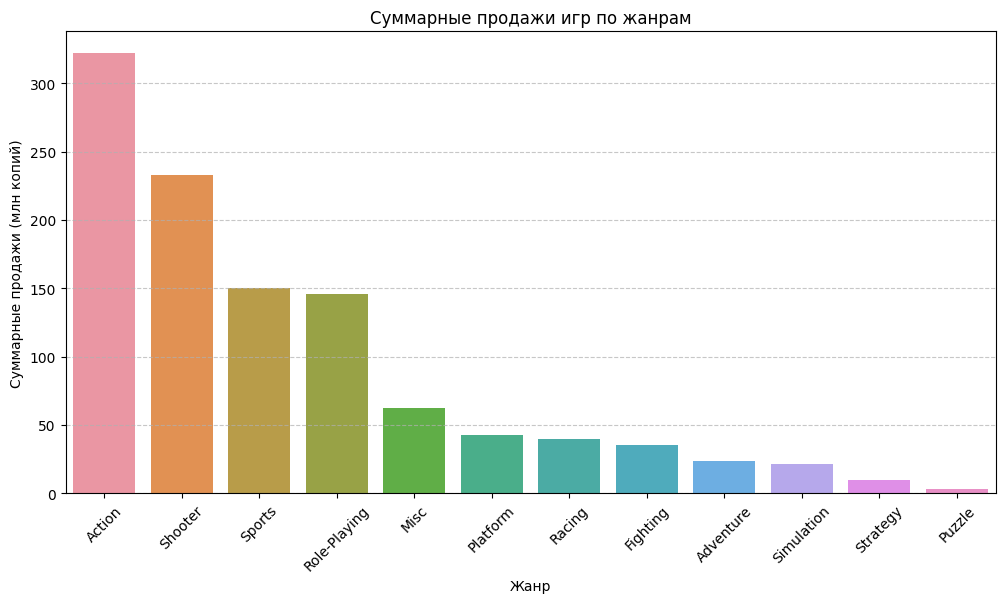

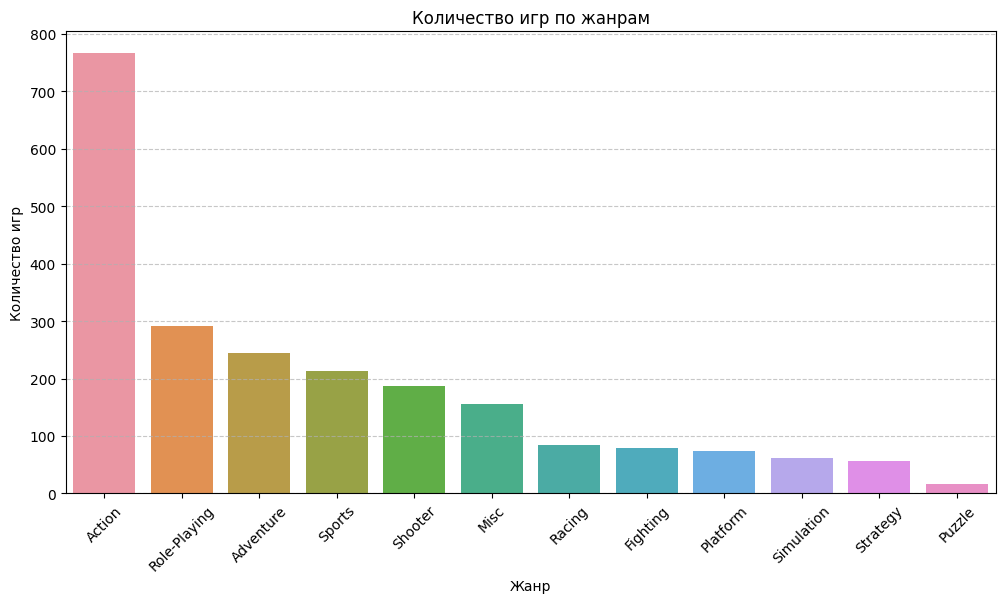

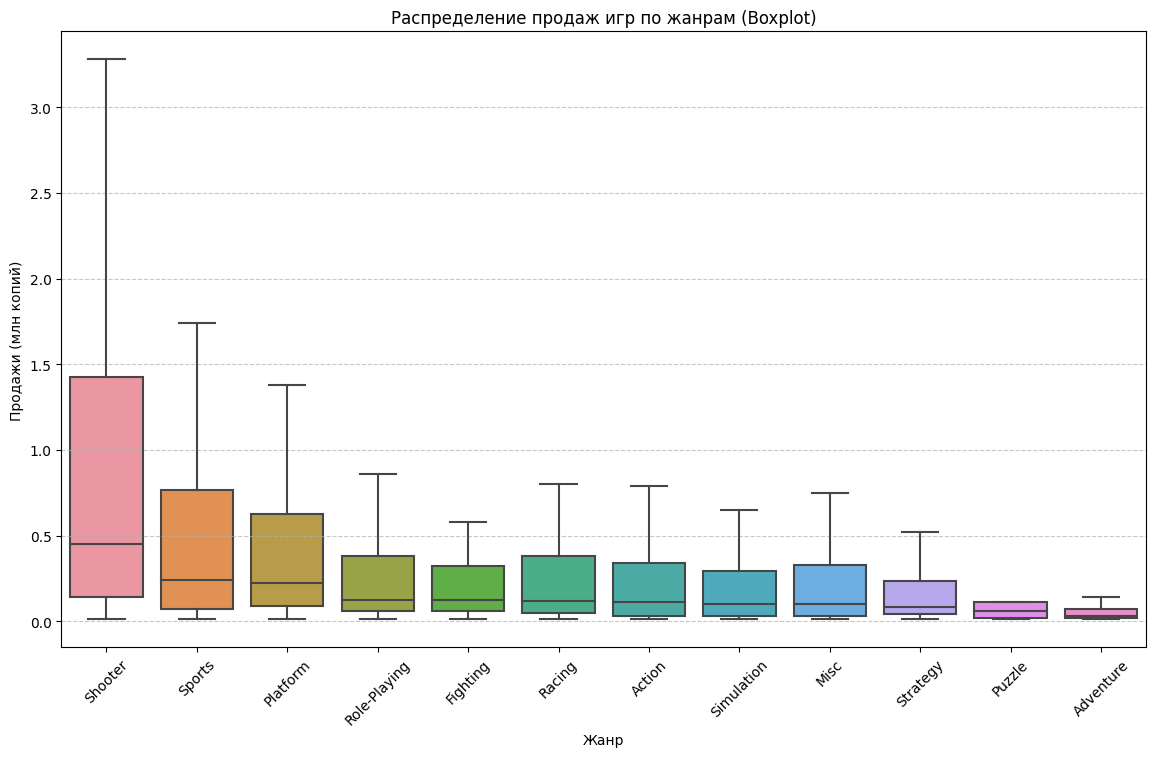

,genre,total_sales,game_count,median_sales
0,Action,321.87,766,0.110
1,Shooter,232.98,187,0.450
2,Sports,150.65,214,0.240
3,Role-Playing,145.89,292,0.125
4,Misc,62.82,155,0.100
5,Platform,42.63,74,0.225
6,Racing,39.89,85,0.120
7,Fighting,35.31,80,0.125
8,Adventure,23.64,245,0.030
9,Simulation,21.76,62,0.100


In [24]:
# Суммарные продажи по жанрам
genre_sales = filtered_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Количество игр по жанрам
genre_counts = filtered_data['genre'].value_counts()

# Медианные продажи по жанрам
genre_median_sales = filtered_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Построение графика суммарных продаж
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Суммарные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Построение графика количества игр по жанрам
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Количество игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Сортировка жанров по медиане
sorted_genres = genre_median_sales.index

# Построение диаграмм размаха (Boxplot) для медианных продаж по жанрам
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=filtered_data,
    x='genre',
    y='total_sales',
    order=sorted_genres,  # Сортировка жанров по медиане
    showfliers=False
)
plt.title('Распределение продаж игр по жанрам (Boxplot)')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Создание таблицы анализа
genre_analysis = pd.DataFrame({
    'genre': genre_sales.index,
    'total_sales': genre_sales.values,
    'game_count': [genre_counts[genre] for genre in genre_sales.index],
    'median_sales': [genre_median_sales[genre] for genre in genre_sales.index]
}).sort_values(by='total_sales', ascending=False)

# Вывод таблицы
genre_analysis

Жанры Shooter, Sports, и Action лидируют по медианным продажам, составляя 0.450, 0.240, и 0.110 млн копий соответственно. Жанр Shooter демонстрирует не только наивысшую медиану, но и самый широкий размах продаж, что указывает на наличие нескольких бестселлеров, обеспечивающих высокие доходы. Sports и Platform также имеют высокие медианные показатели (0.240 и 0.225 млн), что делает их перспективными для проектов среднего уровня. Напротив, жанры Puzzle и Adventure показывают наименьшую медиану (0.060 и 0.030 млн), что свидетельствует о низком спросе среди пользователей.

Жанр Action, несмотря на лидирующую позицию по суммарным продажам (321.87 млн копий) и количеству выпущенных игр (766), имеет относительно низкую медиану (0.110 млн). Это указывает на то, что основная доля продаж в этом жанре приходится на крупные проекты-бестселлеры, тогда как большая часть игр имеет скромные продажи. Напротив, жанры с меньшим количеством игр, такие как Shooter и Platform, показывают более высокую медиану, что подчёркивает их стабильный спрос и потенциал для создания успешных проектов.

Таким образом, наиболее перспективными жанрами для разработки остаются Shooter и Sports, которые сочетают высокую медиану продаж с меньшим количеством выпущенных игр, обеспечивая устойчивую доходность. Жанры, такие как Action и Role-Playing, требуют большего акцента на масштабные проекты для достижения успеха, в то время как жанры Puzzle и Adventure остаются нишевыми и менее прибыльными для массового рынка.

В рамках исследовательского анализа данных был выбран актуальный период с 2013 года. Это решение было обусловлено необходимостью учитывать быстроменяющиеся тренды игровой индустрии, в которой новые платформы и жанры быстро вытесняют старые. Анализ данных за этот период позволяет выделить ключевые платформы и жанры, которые остаются востребованными и перспективными.

Основные результаты анализа:
- Популярные платформы: Лидерами по продажам являются PS4 (314.14 млн), PS3 (181.43 млн), XOne (159.32 млн), и 3DS (143.25 млн). Среди них PS4 и XOne демонстрируют наибольший потенциал роста, находясь на ранних этапах жизненного цикла, в то время как PS3 и X360 постепенно теряют популярность.
- Влияние оценок на продажи: Анализ показал, что оценки критиков оказывают умеренное положительное влияние на продажи игр (корреляция до 0.42), особенно на современных платформах, таких как XOne. Оценки пользователей оказывают слабое или отсутствующее влияние, за исключением платформы 3DS, где наблюдается слабая положительная зависимость (0.24).
- Популярные жанры: Наибольшие суммарные продажи зафиксированы у жанров Action (321.87 млн), Shooter (232.98 млн), и Sports (150.65 млн). Однако медианные продажи показывают, что жанры Shooter (0.450 млн) и Sports (0.240 млн) обладают более стабильной доходностью по сравнению с Action (0.110 млн), где успех обеспечивают лишь крупные проекты.
- Распределение продаж: Наиболее устойчивые жанры с высоким спросом включают Shooter и Sports, тогда как Puzzle и Adventure остаются нишевыми и менее прибыльными категориями.

Анализ подтвердил, что для достижения успеха разработчикам стоит сосредоточиться на новых и растущих платформах (PS4, XOne) и популярных жанрах (Shooter, Sports), ориентируясь на проекты с высокой качественной составляющей, способные привлечь внимание как критиков, так и пользователей.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишем различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясним разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [25]:
# Функция для подготовки данных с топ-5 и группой "Others"
def prepare_pie_data(data):
    top5 = data.head(5)
    others = data.iloc[5:].sum()
    pie_data = top5.append(pd.Series({'Others': others}))
    return pie_data

Платформы по регионам (топ-5 + Others):


,NA_SALES,EU_SALES,JP_SALES
3DS,38.20,30.96,67.81
Others,52.49,58.26,4.19
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSV,0.00,0.00,18.59
WiiU,0.00,0.00,10.88
X360,81.66,42.52,0.00
XOne,93.12,51.59,0.00


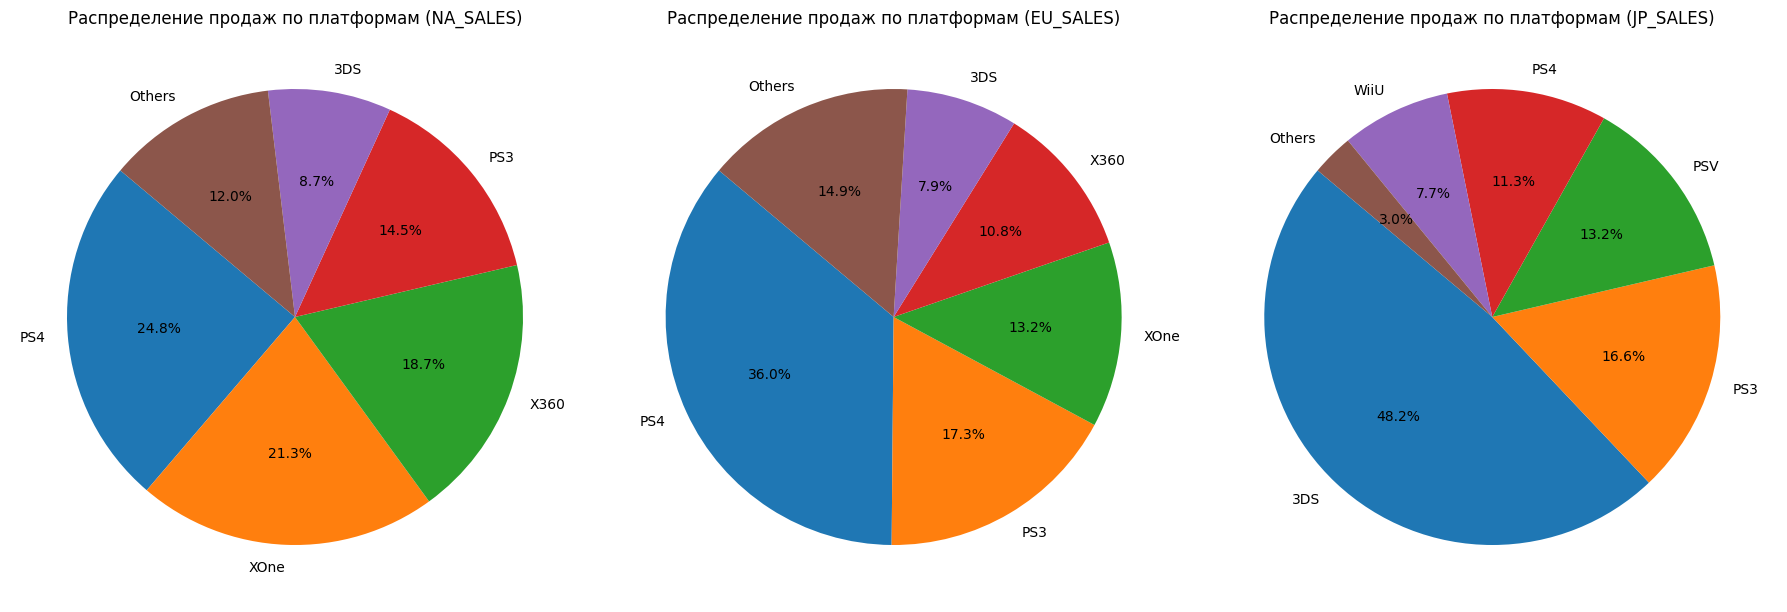

In [26]:
# Анализ популярных платформ по регионам (топ-5 + others)
regions = ['na_sales', 'eu_sales', 'jp_sales']

# Таблица для платформ
platform_tables = {}
print("Платформы по регионам (топ-5 + Others):")
for region in regions:
    region_data = filtered_data.groupby('platform')[region].sum().sort_values(ascending=False)
    pie_data = prepare_pie_data(region_data)
    platform_tables[region.upper()] = pie_data

# Вывод таблиц
platform_df = pd.DataFrame(platform_tables).fillna(0)
display(platform_df)

# Построение круговых диаграмм для платформ
fig, axes = plt.subplots(1, len(regions), figsize=(18, 6))
for i, region in enumerate(regions):
    pie_data = platform_tables[region.upper()]
    axes[i].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Распределение продаж по платформам ({region.upper()})')
plt.tight_layout()
plt.show()

Жанры по регионам (топ-5 + Others):


,NA_SALES,EU_SALES,JP_SALES
Action,126.05,118.13,40.49
Fighting,0.00,0.00,7.65
Misc,27.49,0.00,9.20
Others,62.76,68.56,25.79
Racing,0.00,20.19,0.00
Role-Playing,46.40,36.97,51.04
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,0.00


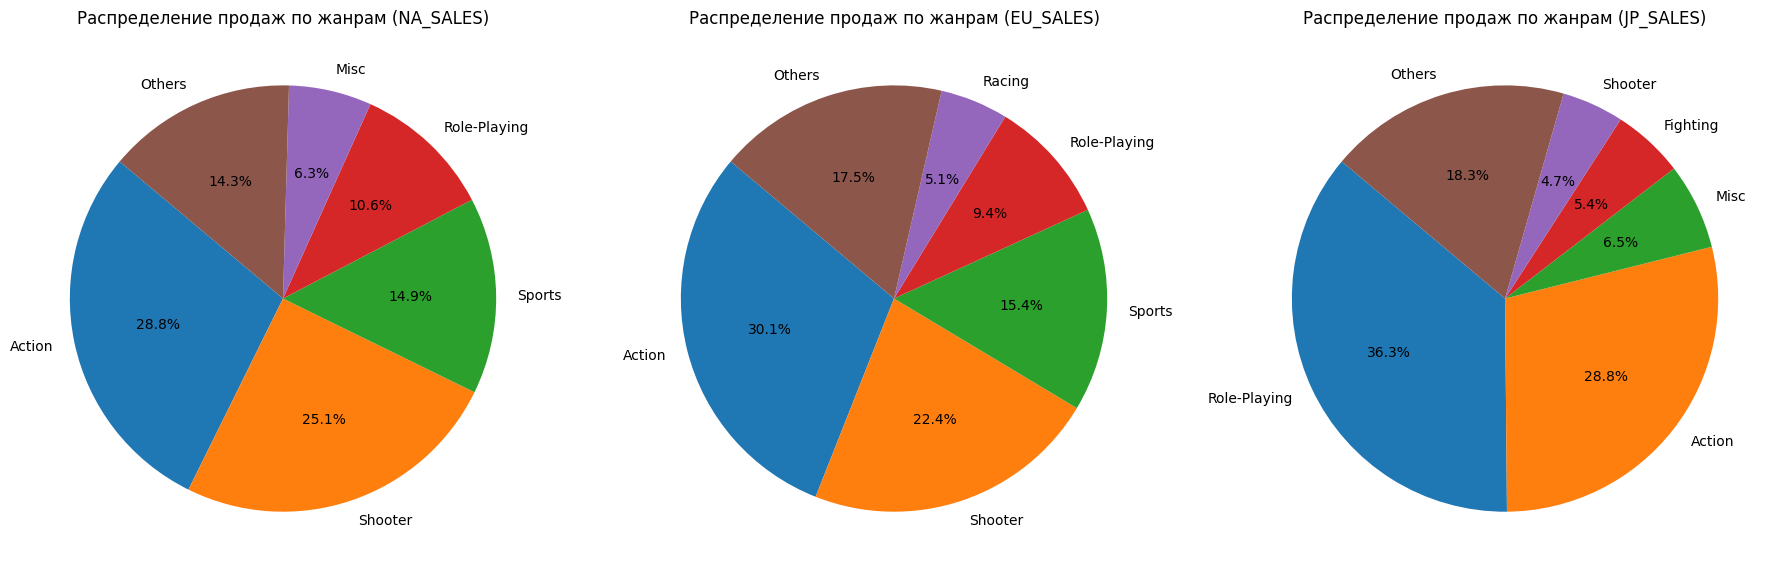

In [27]:
# Анализ популярных жанров по регионам (топ-5 + others)
genre_tables = {}
print("Жанры по регионам (топ-5 + Others):")
for region in regions:
    region_data = filtered_data.groupby('genre')[region].sum().sort_values(ascending=False)
    pie_data = prepare_pie_data(region_data)
    genre_tables[region.upper()] = pie_data

# Вывод таблиц
genre_df = pd.DataFrame(genre_tables).fillna(0)
display(genre_df)

# Построение круговых диаграмм для жанров
fig, axes = plt.subplots(1, len(regions), figsize=(18, 6))
for i, region in enumerate(regions):
    pie_data = genre_tables[region.upper()]
    axes[i].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Распределение продаж по жанрам ({region.upper()})')
plt.tight_layout()
plt.show()

In [28]:
# Анализ влияния рейтингов ESRB по регионам (все рейтинги)
esrb_sales = pd.DataFrame({
    region.upper(): filtered_data.groupby('rating')[region].sum().sort_values(ascending=False)
    for region in ['na_sales', 'eu_sales', 'jp_sales']
}).fillna(0).sort_values(by='NA_SALES', ascending=False)

esrb_sales

,NA_SALES,EU_SALES,JP_SALES
rating,,,
M,165.21,145.32,14.11
unknown,89.42,78.91,85.05
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
T,49.79,41.95,20.59
AO,0.00,0.00,0.00
EC,0.00,0.00,0.00
K-A,0.00,0.00,0.00
RP,0.00,0.00,0.00


Наибольшие продажи в Северной Америке демонстрируют PS4 (24.8%), XOne (21.3%), и X360 (18.7%), что подчёркивает доминирование стационарных консолей. В Европе лидируют PS4 (36.0%), PS3 (17.3%), и XOne (13.2%), также с акцентом на стационарные устройства. На японском рынке ситуация принципиально иная: тут доминируют портативные платформы, такие как 3DS (48.2%) и PSV (13.2%), что отражает региональные предпочтения к мобильным играм. Интересно отметить, что платформа PS4 имеет стабильные позиции во всех регионах, в то время как XOne практически отсутствует в Японии. Группа "Others" занимает заметную долю в Северной Америке (12.0%) и Европе (14.9%), но минимальна в Японии (3.0%).

Жанр Action лидирует в Северной Америке (28.8%) и Европе (30.1%), оставаясь одним из самых популярных во всех регионах. В Японии он занимает второе место (36.3%), уступая жанру Role-Playing (36.0%), который доминирует из-за локальных предпочтений. В Северной Америке и Европе жанр Shooter стабильно занимает вторую позицию (25.1% и 22.4% соответственно), что подтверждает его популярность среди западной аудитории, но в Японии его доля минимальна (4.7%). Жанры, такие как Sports, занимают значительные доли в Северной Америке (14.9%) и Европе (15.4%), но практически отсутствуют в Японии. Локальные жанры, такие как Fighting, более заметны только в Японии (5.4%).

Игры с рейтингом M (для взрослых) лидируют по продажам в Северной Америке (165.21 млн) и Европе (145.32 млн), демонстрируя популярность игр для зрелой аудитории на этих рынках. В Японии, напротив, наибольшую долю занимают игры с рейтингом unknown (85.05 млн), что может быть связано с отсутствием данных или различиями в системе рейтингов. Рейтинги E и T также популярны в Северной Америке и Европе, отражая универсальный спрос на игры для широкой аудитории. В Японии значительную роль играют игры с рейтингом E и Role-Playing, что соответствует популярности семейных и ролевых игр.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для начала сфорулируем гипотезы в терминах проверки на стат. значимость:

- Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Установим уровня значимости а = 0.05

Поскольку мы сравниваем средние значения двух независимых выборок, хотим использовать t-тест для независимых выборок.

In [29]:
# Данные для Xbox One
xbox_data = filtered_data[(filtered_data['platform'] == 'XOne') & filtered_data['user_score'].notnull()]['user_score']

# Данные для PC
pc_data = filtered_data[(filtered_data['platform'] == 'PC') & filtered_data['user_score'].notnull()]['user_score']

# Уровень значимости
alpha = 0.05

# Проведение t-критерия Стьюдента для Xbox One и PC
stat, p_value = ttest_ind(xbox_data, pc_data, equal_var=False, alternative='two-sided')

# Вывод результатов
print(f"t-статистика: {stat:.5f}, p-значение: {p_value:.7f}")

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC различаются.")
else:
    print("Не удалось отклонить нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC одинаковые.")

t-статистика: 1.45193, p-значение: 0.1475959
Не удалось отклонить нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC одинаковые.


Результаты t-критерия Стьюдента (t-статистика: 1.45193, p-значение: 0.1475959) показывают, что при уровне значимости 0.05 нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не отклоняется. Это означает, что статистически значимых различий между средними пользовательскими рейтингами этих платформ не обнаружено. Значение p-значения, превышающее уровень значимости, указывает на то, что различия в пользовательских оценках между Xbox One и PC могут быть случайными и не подтверждают наличие систематических предпочтений аудитории для этих платформ.

### Средние пользовательские рейтинги жанров Action и Sports

Проверим гипотезу о том, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

Устанавливаем уровень значимости: a = 0.05.

Тут аналогичный тест.

In [30]:
# Данные для жанра Action
action_data = filtered_data[(filtered_data['genre'] == 'Action') & filtered_data['user_score'].notnull()]['user_score']

# Данные для жанра Sports
sports_data = filtered_data[(filtered_data['genre'] == 'Sports') & filtered_data['user_score'].notnull()]['user_score']

# Уровень значимости
alpha = 0.05

# Проведение t-критерия Стьюдента для жанров Action и Sports
stat, p_value = ttest_ind(action_data, sports_data, equal_var=False, alternative='two-sided')

# Вывод результатов
print(f"t-статистика: {stat:.5f}, p-значение: {p_value:.7f}")

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не удалось отклонить нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.")

t-статистика: 10.23343, p-значение: 0.0000000
Отклоняем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.


Результаты t-критерия Стьюдента (t-статистика: 10.23343, p-значение: 0.0000000) показывают, что при уровне значимости 0.05 нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports отклоняется. Это означает, что средние пользовательские оценки для этих жанров статистически значимо различаются. Малое значение p-значения указывает на сильные различия в средних оценках между жанрами Action и Sports, что может быть связано с разными предпочтениями аудитории или качеством игр, представленным в этих жанрах.

Таким образом, в ходе двух проведённых тестов были проверены гипотезы о различиях пользовательских рейтингов для платформ Xbox One и PC, а также для жанров Action и Sports. В первом тесте (t-критерий Стьюдента) было обнаружено, что средние пользовательские рейтинги для Xbox One и PC не различаются статистически значимо (p-значение: 0.1475959), что свидетельствует об отсутствии существенных различий в восприятии игр пользователями этих платформ. Во втором тесте (t-критерий Стьюдента) было установлено, что средние пользовательские рейтинги для жанров Action и Sports статистически значимо различаются (p-значение: 0.0000000), что указывает на явные различия в предпочтениях аудитории или качестве игр, представленных в этих жанрах. Таким образом, первый тест не выявил различий, а второй подтвердил их наличие.

## Заключение и выводы

В ходе работы были выполнены все этапы, предусмотренные первоначальным планом.

На этапе предобработки данных структура данных была приведена к удобному формату: названия столбцов преобразованы в змеиную нотацию, пропуски в данных обработаны в зависимости от их природы (например, рейтинг ESRB заполнен значением "unknown", пропуски в названиях игр и годах выпуска удалены). Дубликаты в данных отсутствовали, за исключением двух неявных дублей, из которых были оставлены более достоверные записи. Также был добавлен новый столбец с суммарными продажами во всех регионах, что упростило последующий анализ. Из данных были удалены устаревшие записи для платформ, таких как DS до 2004 года, так как они не отражают современную игровую индустрию.

На этапе исследовательского анализа данных (EDA) актуальный период анализа был определён начиная с 2013 года, чтобы учесть современные тренды и исключить влияние устаревших данных. Анализ продаж показал, что популярность платформ и жанров значительно варьируется между регионами. Жизненный цикл платформ составляет около 10 лет, и на данный момент лидируют PS4 и XOne, которые находятся в фазе роста. Оценки критиков оказывают умеренное влияние на продажи игр, в то время как оценки пользователей практически не коррелируют с продажами. Жанры Shooter, Sports и Action оказались наиболее прибыльными, с высокими медианными продажами, в то время как жанры Puzzle и Adventure показали низкие продажи, оставаясь нишевыми.

Анализ предпочтений пользователей по регионам выявил значительные различия. В Северной Америке и Европе доминируют стационарные консоли (PS4, XOne), а в Японии — портативные устройства (3DS, PSV). Предпочтения по жанрам также различаются: в Северной Америке и Европе популярны Shooter и Action, в то время как в Японии лидирует Role-Playing. Во всех регионах игры с рейтингом "E" (для всех) остаются наиболее продаваемыми, что подчёркивает универсальность этой категории.

На этапе проверки гипотез t-критерий Стьюдента подтвердил, что средние пользовательские рейтинги для платформ Xbox One и PC статистически не различаются (p-значение: 0.14760). Однако тест выявил значимое различие средних пользовательских рейтингов жанров Action и Sports (p-значение: 0.00000), что может быть связано с разным качеством или восприятием игр в этих жанрах.

Для продвижения продуктов в 2017 году следует учитывать региональные особенности. В Северной Америке и Европе стоит сосредоточиться на стационарных консолях (PS4, XOne) и жанрах Shooter, Sports и Action. В Японии рекомендуется акцентироваться на портативных платформах (3DS, PSV) и жанре Role-Playing. Игры с рейтингом "E" остаются наиболее перспективными для массового продвижения во всех регионах. Также важно учитывать влияние оценок критиков, которые играют ключевую роль в повышении продаж игр, особенно в прибыльных жанрах.